@file:   ml_income_prediction.py
@date:   2/6/2019
@author: Jan Polzer and Ryan Duckworth

Import packages

In [1]:
import numpy as np              # math tools
import pandas as pd             # import and manage datasets
import matplotlib.pyplot as plt # plot charts
import sklearn

Load dataset

In [2]:
data = pd.read_csv('adult.csv')

Drop data without values

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)

Matrix of independent variables

In [4]:
X = data.iloc[:, :-1].values 

Dependent variable vector


In [5]:
y = data.iloc[:, 14].values

Split dataset into Test set and Training set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Explore dataset

In [7]:
data = data.sample(frac = 0.1, random_state = 1)
print(data.columns)
print(data.shape)
print(data.describe())
print(data.shape)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')
(3256, 15)
               age    workclass        fnlwgt    education  education.num  \
count  3256.000000  3256.000000   3256.000000  3256.000000    3256.000000   
mean     21.766278     3.851966  10443.531941    10.279177       9.099816   
std      13.851607     1.502752   6057.265376     3.860041       2.580475   
min       0.000000     0.000000      0.000000     0.000000       0.000000   
25%      10.750000     4.000000   5192.250000     9.000000       8.000000   
50%      20.000000     4.000000  10339.500000    11.000000       9.000000   
75%      31.000000     4.000000  15468.250000    12.000000      12.000000   
max      72.000000     8.000000  21645.000000    15.000000      15.000000   

       marital.status   occupation  relatio

Plot historgram for each parameter

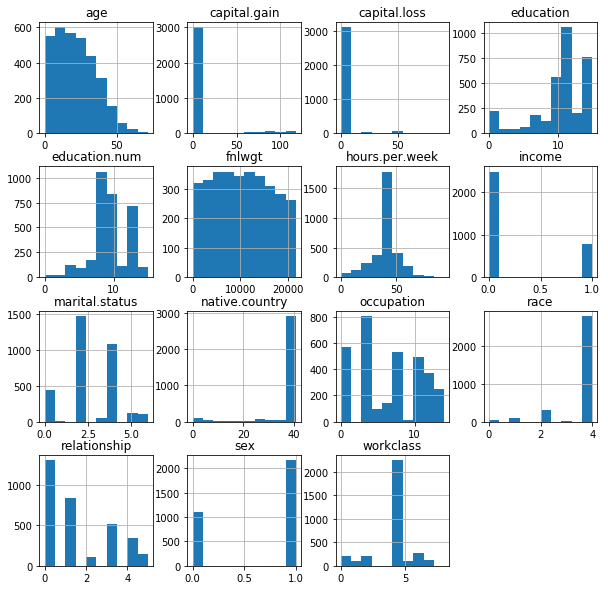

In [8]:
data.hist(figsize = (10, 10))
plt.show()

Determine if income is over/uner $50k

In [9]:
Over50k = data[data['income'] == 0]
Under50k = data[data['income'] == 1]

print('Income over $50k: {}'.format(len(Over50k)) + ' samples')
print('Income under $50k: {}'.format(len(Under50k)) + ' samples')

Income over $50k: 2468 samples
Income under $50k: 788 samples
